# Ford Gobike result dataset 
## by Kihun Kim 

## Preliminary Wrangling : Motivation 


### I constructed 3 big parts of this data warangling
1. Bivariate Exploration of data :  Handling single variable for visualization
2. Univariate Exploration of data : Handling two variables for visualization
3. Multivariate Exploration of data : Handling more than 2 variables for visualization

In [82]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore") 


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [83]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [84]:
df.shape
#shape of df

(519700, 13)

In [85]:
sum(df.duplicated())
# NO duplication 

0

In [86]:
df.isna().sum()
# there are a few missing value.Those are all numeric values. 

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### What is the structure of your dataset?

This dataset consists of 519700 rows and 13 columns

### What is/are the main feature(s) of interest in your dataset?

- user_type
- bike_id
- start_station_id
- end_station_id 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_time
- ent_time
- duration


### Unnecessary featues in the dataset do you think (remove it before we start to visualized) ? 

- start_station_name
- end_station_name
- start_station_latitude
- start_station_longitude
- end_station_latitude 
- end_station_longitude



In [87]:
df = df.drop(columns=['start_station_name', 'end_station_name','start_station_latitude','start_station_longitude',
                'end_station_latitude','end_station_longitude'])

In [88]:
df.head()

# Subscriber : regular customer,subscribed
# Customer : casual customer,unsubscribed 

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

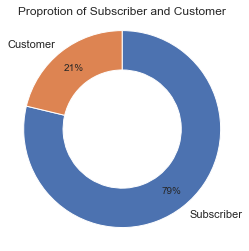

In [89]:
# Pie charts 
sorted_counts = df['user_type'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');
plt.title('Proprotion of Subscriber and Customer')
plt.axis('square');

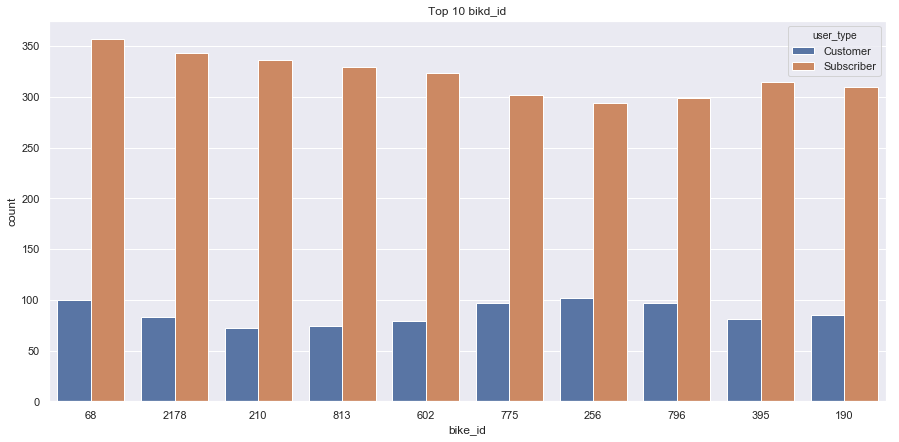

In [96]:
# countplot
plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='bike_id',hue='user_type',order=df.bike_id.value_counts().head(10).index)
plt.title('Top 10 bikd_id');

In [79]:
# lineplot 
df2 = df.copy()
#To keep original dataset use .copy()
df2['Hour'] = pd.to_datetime(df2['start_time']).dt.hour
df2['Minute'] = pd.to_datetime(df2['start_time']).dt.minute
df2['Second'] = pd.to_datetime(df2['start_time']).dt.second
df2['Count'] = 1
df2.head(1)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,Hour,Minute,Second,Count
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,16,57,39,1


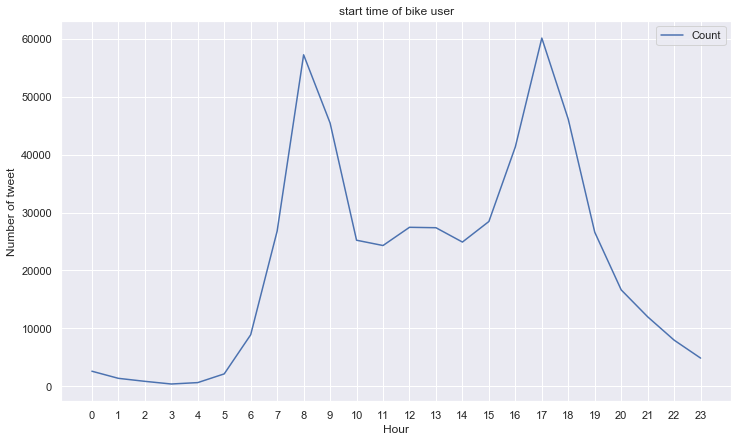

In [80]:
keys = [pair for pair, df in df2.groupby(['Hour'])]
plt.subplots(figsize=(12,7))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Number of tweet')
plt.xticks(keys)
plt.title('start time of bike user')
plt.legend()
plt.show()

# 8am and 5pm are most pouplar time that people rent a bike.
# I guess people ride a bike to go to work and get back home.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In this part there were no ususal points. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Remove unneccessary columns,which i won't use in the project

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

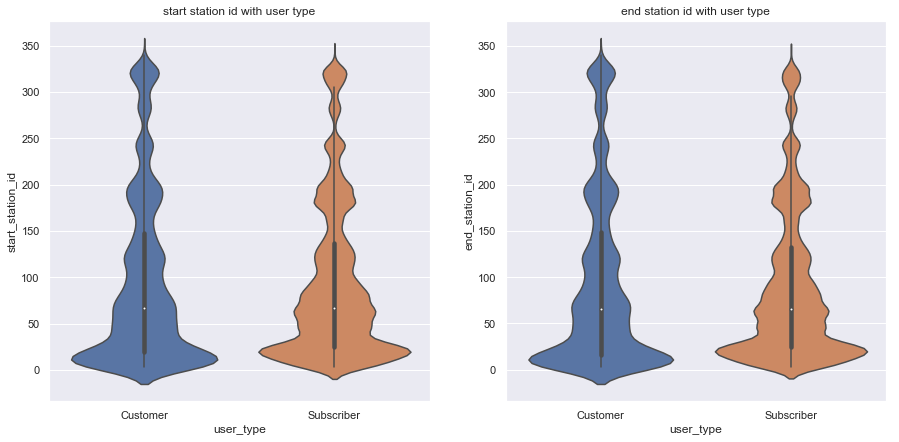

In [106]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.violinplot(data=df,x='user_type',y='start_station_id',ax=ax[0])
ax[0].set_title('start station id with user type')
sns.violinplot(data=df,x='user_type',y='end_station_id',ax=ax[1])
ax[1].set_title('end station id with user type')
plt.show()

# shows almost same plotting shape
# start & end station id with lower number are popular station that people visit.

In [114]:
# heatmap
# value round !!!!!!
df.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber


In [115]:
# scatterplot 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
#FaceGrid 

In [103]:
#scatterplot with size or shape 

#plt.subplots(figsize=(15,7))
#g = sns.FacetGrid(data=df,col='start_station_id','end_station_id'],row='user_type')
#g.map(plt.scatter,'bike_id')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!